### 1. Import required libraries and read the dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer,SimpleImputer
from scipy.stats import zscore
from sklearn.preprocessing import FunctionTransformer

import warnings 
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('honeyproduction.csv')

In [3]:
data.head()

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,AL,16000.0,71,1136000.0,159000.0,0.72,818000.0,1998
1,AZ,55000.0,60,3300000.0,1485000.0,0.64,2112000.0,1998
2,AR,53000.0,65,3445000.0,1688000.0,0.59,2033000.0,1998
3,CA,450000.0,83,37350000.0,12326000.0,0.62,23157000.0,1998
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998


### 2. Check the first few samples, shape, info of the data and try to familiarize yourself with different features.

In [4]:
data.sample(10)

,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
618,TX,92000.0,52,4784000.0,718000.0,2.00,9568000.0,2012
202,OH,18000.0,70,1260000.0,504000.0,1.44,1814000.0,2002
477,IA,26000.0,42,1092000.0,339000.0,1.60,1747000.0,2009
32,PA,26000.0,66,1716000.0,789000.0,0.80,1373000.0,1998
180,HI,7000.0,136,952000.0,29000.0,1.11,1057000.0,2002
186,KY,5000.0,54,270000.0,78000.0,1.63,440000.0,2002
545,WY,34000.0,36,1224000.0,282000.0,1.59,1946000.0,2010
260,WY,39000.0,81,3159000.0,474000.0,1.41,4454000.0,2003
4,CO,27000.0,72,1944000.0,1594000.0,0.70,1361000.0,1998
207,SD,225000.0,51,11475000.0,2410000.0,1.42,16295000.0,2002


In [5]:
data.shape

(626, 8)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626 entries, 0 to 625
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   state        626 non-null    object 
 1   numcol       626 non-null    float64
 2   yieldpercol  626 non-null    int64  
 3   totalprod    626 non-null    float64
 4   stocks       626 non-null    float64
 5   priceperlb   626 non-null    float64
 6   prodvalue    626 non-null    float64
 7   year         626 non-null    int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 39.2+ KB


### 3. Display the percentage distribution of the data in each year using the pie chart.

In [7]:
data2 = data.copy()

In [8]:
data2.year.value_counts()

2001    44
2002    44
2003    44
1998    43
1999    43
2000    43
2004    41
2005    41
2006    41
2007    41
2008    41
2009    40
2010    40
2011    40
2012    40
Name: year, dtype: int64

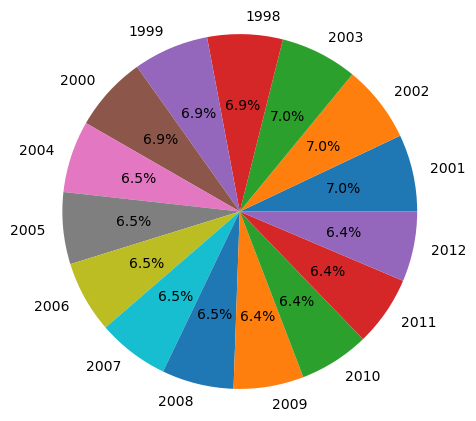

In [9]:
plt.pie(data2.year.value_counts(), autopct = '%.1f%%', radius = 1.2, labels = [2001, 2002, 2003, 1998, 1999, 2000, 2004, 2005, 2006, 2007, 2008,
       2009, 2010, 2011, 2012])
plt.show()

### 4. Plot and Understand the distribution of the variable "price per lb" using displot, and write your findings.


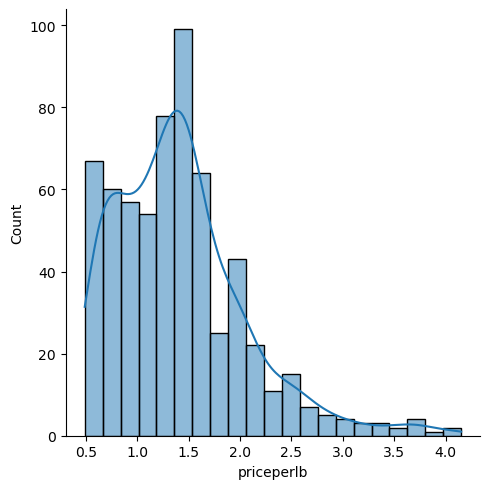

In [10]:
sns.displot(data2['priceperlb'],kde = True)

#### observations:
* The graph is right skewed.

### 5. Plot and understand the relationship between the variables 'numcol' and 'prodval' through scatterplot, and write your findings.


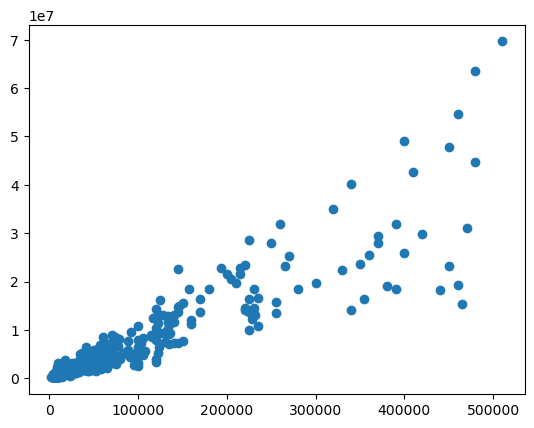

In [11]:
plt.scatter(data2['numcol'],data2['prodvalue'])
plt.show()

##### Number of honey producing colonies and Value of production (total prod x priceperlb). Unit is dollars is directly proportional to each other
* The number of colonies is less means that the value of production is also less
* These two variable has a strong positive correlation.

### 6. Plot and understand the relationship between categorical variable 'year' and a numerical variable 'prodvalue' through boxplot, and write your findings.


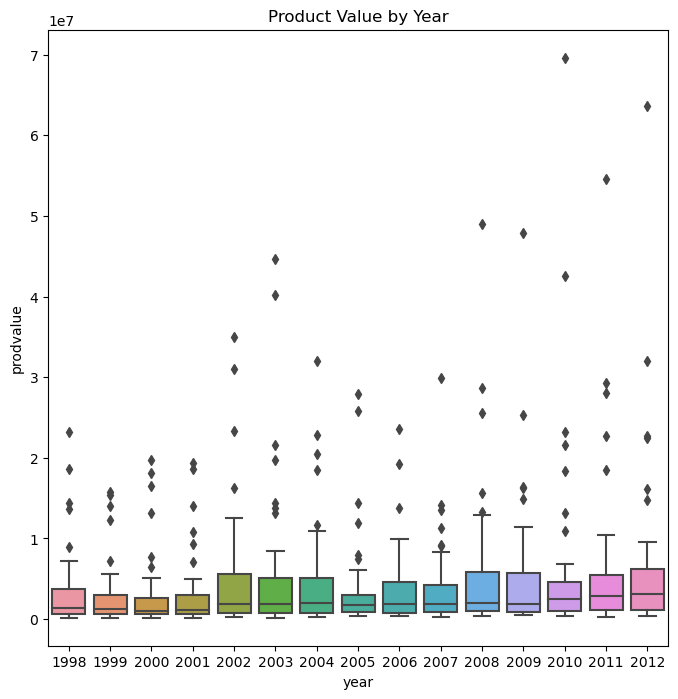

In [12]:
plt.figure(figsize = (8,8))
sns.boxplot(x = data2['year'], y=data2['prodvalue'])
plt.title('Product Value by Year')
plt.show()

#### Almost all the year from 1998 to 2012 the value of production is approximately within 10 million every year.
* The 50% of product value 2 million to 4 million fro every year.
* The minimum product value for every year is also approximately equal to each other
* The maximum product value have significant diffrence for each year.
* In the year  2002 and 2008 achieve maximum value of production.

In [13]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 626 entries, 0 to 625
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   state        626 non-null    object 
 1   numcol       626 non-null    float64
 2   yieldpercol  626 non-null    int64  
 3   totalprod    626 non-null    float64
 4   stocks       626 non-null    float64
 5   priceperlb   626 non-null    float64
 6   prodvalue    626 non-null    float64
 7   year         626 non-null    int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 39.2+ KB


### 7. Visualize and understand the relationship between the multiple pairs of variables throughout different years using pairplot and add your inferences. (use columns 'numcol', 'yield percol', 'total prod', 'prodvalue','year')


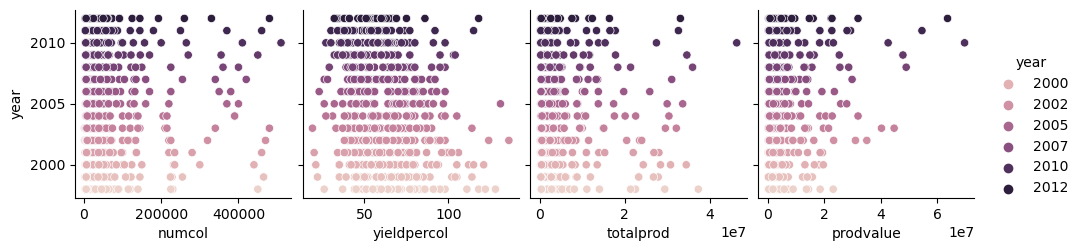

In [14]:
sns.pairplot(data2,x_vars = ['numcol', 'yieldpercol', 'totalprod', 'prodvalue'],y_vars ='year',hue = 'year')

#### The year variable almost has no correlation with number of colonies,Honey yield per colony,Total production,Value of production
* The plot obtained is look like a cloud.so none of the above variable has no significant positive or negative correlation


### 8. Display the correlation values using a plot and add your inferences. (use columns 'numcol', 'yield percol','total prod', 'stocks', 'price per lb', 'prodvalue')

In [15]:
data1 = data2.copy()
data1.drop(['state'],axis=1,inplace=True)

<Axes: >

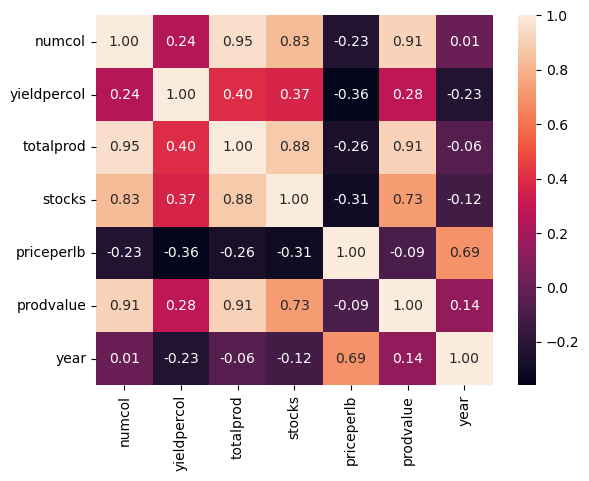

In [16]:
sns.heatmap(data1.corr(),annot=True,fmt='.2f')

#### observations:
* number of colonies and total production has highest correlation(0.95)
* The number of colonies and value of production has the correlation 0.91
* The totalproduction value and value of production has the correlation 0.91
* stocks and the total production has the correlation 0.88
* If we train a model with target as value of production ,the number of correlation ,total production,stocks has good positive correlation with the target variable.The price  per lb has poor correlation with the target variable.